# Get the Data

In [1]:
# Import the Path class from the pathlib module
from pathlib import Path

# Import the pandas library as pd
import pandas as pd

# Import the tarfile module
import tarfile

# Import the request module from urllib
import urllib.request

# Define the load_housing_data function
def load_housing_data():
    # Define the path to the tarball file
    tarball_path = Path("datasets/housing.tgz")
    
    # Check if the tarball file exists in the local file system
    if not tarball_path.is_file():
        # If the tarball file does not exist, create the datasets directory (and parent directories if necessary)
        Path("datasets").mkdir(parents=True, exist_ok=True)
        
        # Specify the URL of the tarball file on Github
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        
        # Download the tarball file from the URL
        urllib.request.urlretrieve(url, tarball_path)
        
        # Open the tarball file
        with tarfile.open(tarball_path) as housing_tarball:
            # Extract the contents of the tarball file to the datasets directory
            housing_tarball.extractall(path="datasets")
    
    # Return the housing data loaded into a Pandas data frame
    return pd.read_csv(Path("datasets/housing/housing.csv"))

# Call the load_housing_data function and assign the result to the housing variable
housing = load_housing_data()


# Imports

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Investigate Data

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


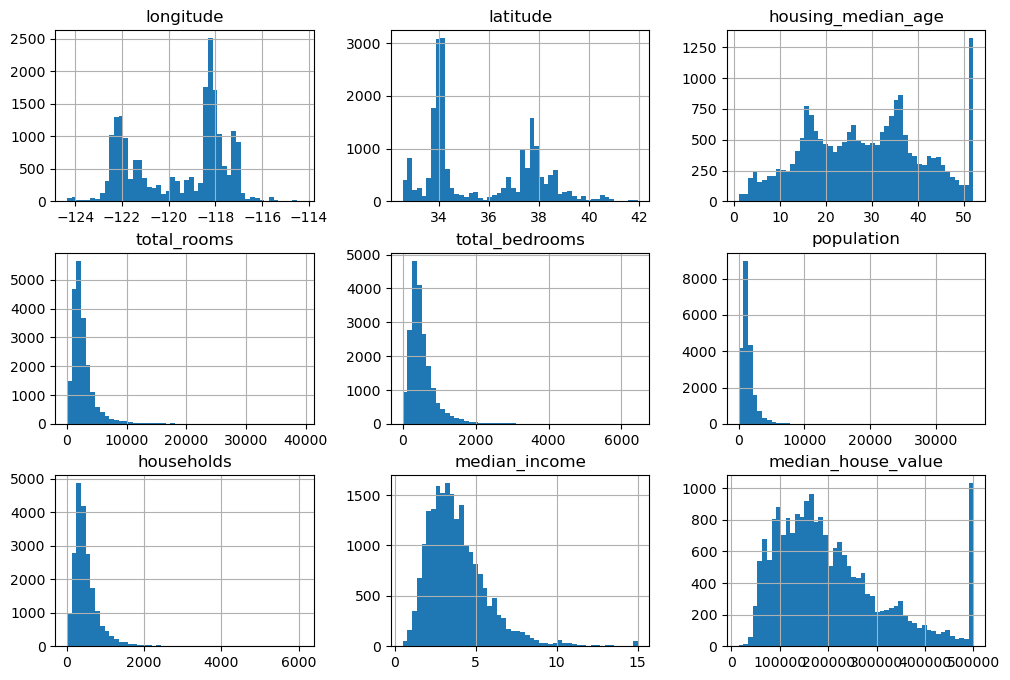

In [7]:
housing.hist(bins=50,figsize=(12,8))
plt.show()

**Some observations:**
1) Medican income seems low. Could be hundreds

2) Different scales

3) Capped attributes

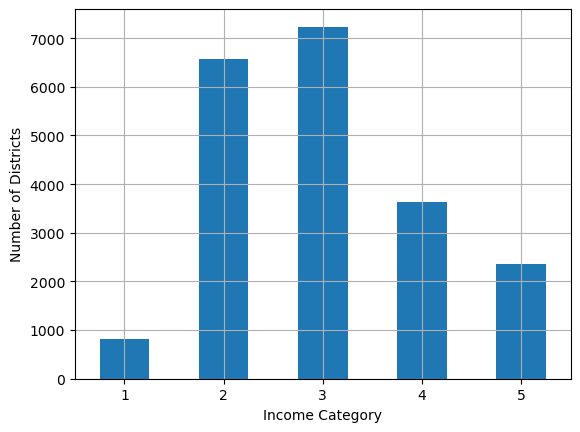

In [10]:
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],
                            labels=[1,2,3,4,5])
housing.income_cat.value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.show()

In [11]:
housing.drop("income_cat", axis=1, inplace=True)

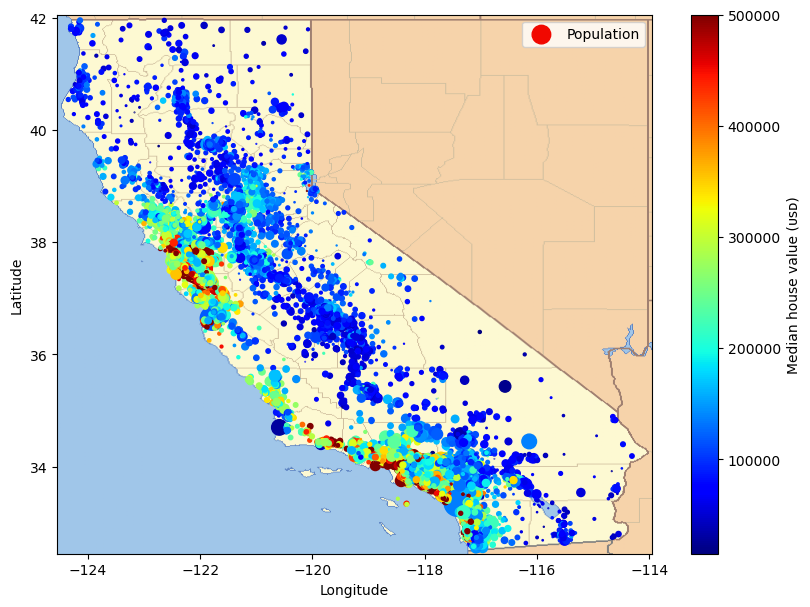

In [23]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread("/Users/zekitekin/Pictures/california.png")
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)
plt.show()

In [24]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

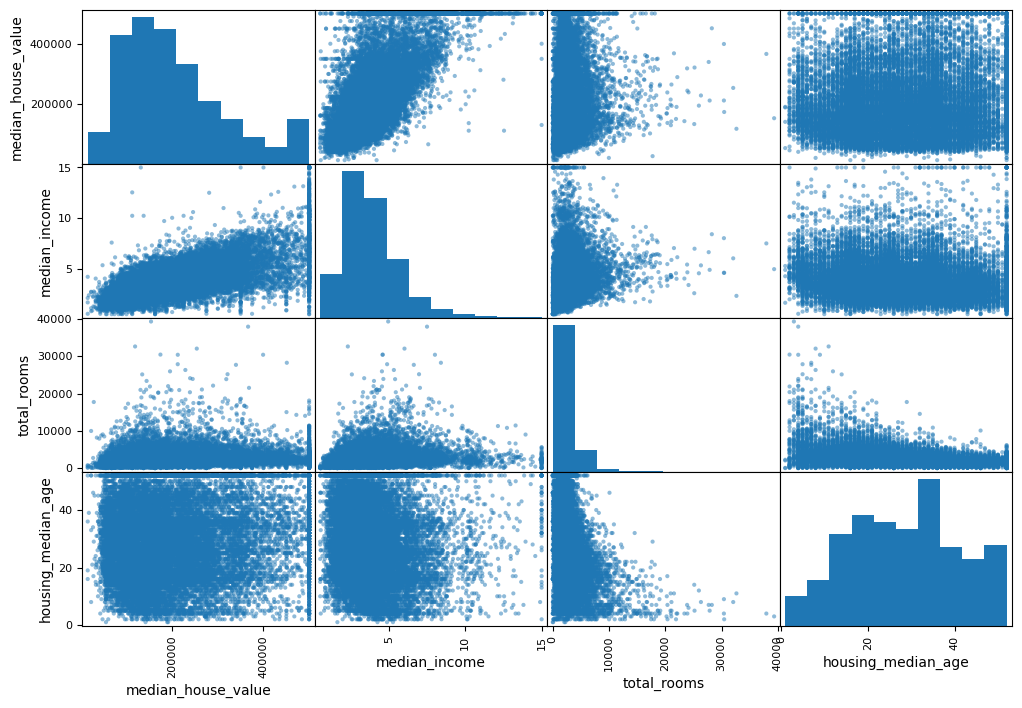

In [29]:
attrs=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attrs],figsize=(12,8))
plt.show()

# Clean the Data

In [31]:
#Create a imputer instance to determine the strategy of dealing with NA values.
imputer=SimpleImputer(strategy='median')

In [34]:
#Since imputer works only on numerical data, select only those columns.
housing_num=housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)
X=imputer.transform(housing_num)

In [35]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [39]:
housing_cat=housing[["ocean_proximity"]]
#Encoding ocean_proximity categories as numerical values
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [41]:
#Encoding ocean_proximity categories as one hot variables
one_hot_encoder=OneHotEncoder()
housing_cat_encoded_onehot=one_hot_encoder.fit_transform(housing_cat)
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [44]:
# Define a function to compute the ratio of two columns
def column_ratio(X):
    # Return the ratio of the first column divided by the second column
    return X[:, [0]] / X[:, [1]]

# Define a pipeline to compute the ratio of two columns
def ratio_pipeline(name=None):
    # Return a pipeline that imputes missing values, computes the column ratio, and scales the result
    return make_pipeline(
        SimpleImputer(strategy="median"), # Impute missing values using the median
        FunctionTransformer(column_ratio, # Compute the column ratio
                            feature_names_out=lambda input_features: [name]), # Set the output feature name
        StandardScaler() # Scale the result
    )

# Define a pipeline to apply the natural logarithm to columns
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), # Impute missing values using the median
    FunctionTransformer(np.log), # Apply the natural logarithm
    StandardScaler() # Scale the result
)

# Define a cluster similarity transformer
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., # Set the number of clusters and the gamma value
                                   random_state=42) # Set the random seed

# Define a default numerical pipeline
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), # Impute missing values using the median
    StandardScaler() # Scale the result
)

# Define a preprocessing pipeline using a ColumnTransformer
preprocessing = ColumnTransformer([
    # Apply the ratio_pipeline to the columns "total_bedrooms" and "total_rooms"
    ("bedrooms_ratio", ratio_pipeline("bedrooms_ratio"), ["total_bedrooms", "total_rooms"]),
    # Apply the ratio_pipeline to the columns "total_rooms" and "households"
    ("rooms_per_house", ratio_pipeline("rooms_per_house"), ["total_rooms", "households"]),
    # Apply the ratio_pipeline to the columns "population" and "households"
    ("people_per_house", ratio_pipeline("people_per_house"), ["population", "households"]),
    # Apply the log_pipeline to the columns "total_bedrooms", "total_rooms", "population", "households", and "median_income"
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    # Apply the cluster_simil to the columns "latitude" and "longitude"
    ("geo", cluster_simil, ["latitude", "longitude"]),
    # Apply the cat_pipeline to the categorical columns
    ("cat", cat_pipeline, make_column_selector(dtype_include=np.object)),
],
    # Apply the default_num_pipeline to any remaining columns
    remainder=default_num_pipeline


array([[-0.57768924,  0.13496281,  0.56862745, ..., -0.95888834,
         0.07933684,  0.80453276],
       [-0.57569721,  0.13071201, -0.21568627, ..., -0.62604835,
         0.07605412,  0.41649313],
       [-0.57968127,  0.12858661,  1.        , ..., -0.94211478,
        -0.06794389,  0.39010148],
       ...,
       [-0.37649402,  0.46439957, -0.37254902, ..., -0.85791811,
        -0.83447125, -0.6812343 ],
       [-0.39641434,  0.46439957, -0.33333333, ..., -0.88554514,
        -0.8114095 , -0.71257438],
       [-0.38047809,  0.45164718, -0.41176471, ..., -0.82601546,
        -0.73949325, -0.69319302]])